In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

# 1. Drive Qubit through resonator

### 2.

In [46]:
num_levels = [10, 3]

a_r = qt.tensor(qt.destroy(num_levels[0]), qt.qeye(num_levels[1]))
a_q = qt.tensor(qt.qeye(num_levels[0]), qt.destroy(num_levels[1]))

In [131]:
omega_q = 4.5 * 2*np.pi # 2pi GHz
omega_r = 7.5 * 2*np.pi # 2pi GHz

g = 0.1 *2*np.pi # 2pi GHz

U = -0.2 *2*np.pi # 2pi GHz

H0 = omega_r*a_r.dag()*a_r + omega_q*a_q.dag()*a_q - U * a_q.dag()*a_q*(a_q.dag()*a_q - 1) + g*(a_q.dag()*a_r + a_r.dag()*a_q)

In [139]:
### add two tone drive

eta_d = 0.01 * 2*np.pi # 2pi GHz
omega_d = 0

H_d = -omega_d*a_r.dag()*a_r + eta_d*(a_r + a_r.dag())
H = H0 + H_d

In [152]:
psi0 = qt.basis(num_levels, [0, 0])

times = np.linspace(0, 200, 10001)

In [153]:
# result = qt.sesolve(H, psi0, times, e_ops=[a_q.dag()*a_q, a_r.dag()*a_r])
result = qt.sesolve(H, psi0, times, e_ops=[a_q.dag()*a_q])

expectation_values = result.expect

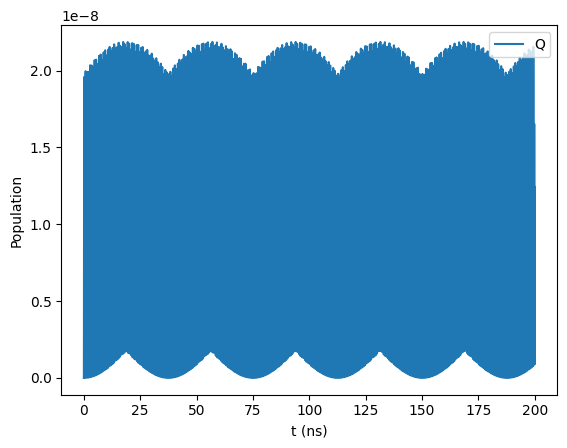

In [154]:
plt.plot(times, expectation_values[0], label='Q')
# plt.plot(times, expectation_values[1], label='R')

plt.xlabel('t (ns)')
plt.ylabel('Population')

plt.legend()
plt.show()